In [3]:
import os
HOME = os.getcwd()
print(HOME)



/media/marcin/5AD6135FD6133B29/Programowanie/Python/Magisterka/Projekt Badawczy/Github/Ticket-to-ride


In [4]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.190 🚀 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2060, 5924MiB)
Setup complete ✅ (12 CPUs, 15.5 GB RAM, 44.0/77.4 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
%cd {HOME}
!yolo task=detect mode=predict model=Roboflow_model/best.pt conf=0.25 source=dataset/age_of_steam/board save=True save_txt=True save_conf=True 


/media/marcin/5AD6135FD6133B29/Programowanie/Python/Magisterka/Projekt Badawczy/Github/Ticket-to-ride
/bin/bash: /home/marcin/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Ultralytics YOLOv8.0.190 🚀 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2060, 5924MiB)
Model summary (fused): 168 layers, 11158866 parameters, 0 gradients, 28.6 GFLOPs

image 1/1 /media/marcin/5AD6135FD6133B29/Programowanie/Python/Magisterka/Projekt Badawczy/Github/Ticket-to-ride/dataset/age_of_steam/board/original.jpg: 480x640 1 10_0, 1 10_2, 1 10_4, 1 11_1, 1 12_2, 1 12_4, 1 13_4, 1 14_1, 1 14_3, 2 1_4s, 1 24_0, 2 2_0s, 3 2_1s, 3 2_2s, 1 2_3, 2 2_4s, 1 2_5, 4 3_0s, 1 3_1, 7 3_2s, 1 4_5, 1 6_1, 1 7_1, 1 9_0, 1 9_2, 28.2ms
Speed: 2.5ms preprocess, 28.2ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict

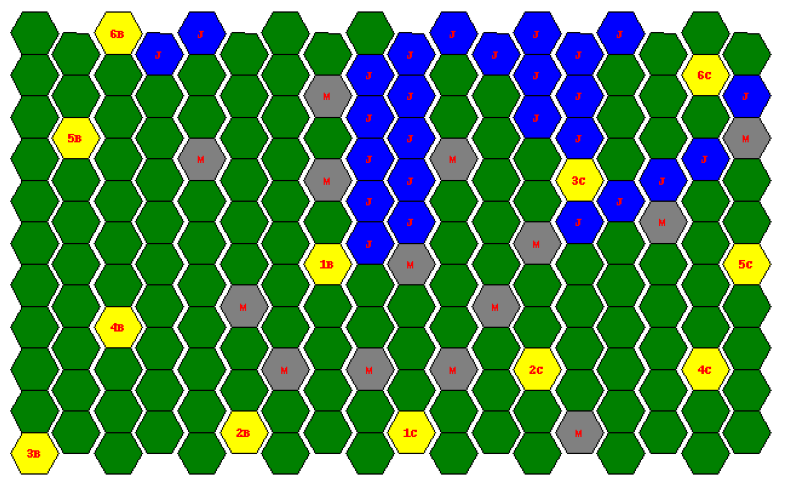

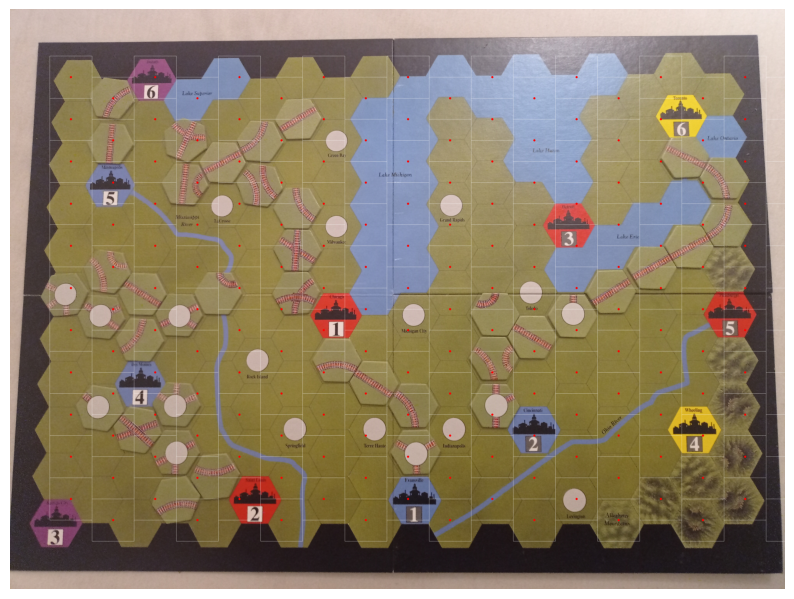

In [185]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import math
import numpy as np


# Liczba kolumn i wierszy w planszy
columns = 18
rows_in_columns = [11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11,10,11,10,11,10,11,10]
rows = 11

# Tworzenie obrazu planszy
image_path = 'dataset/age_of_steam/board/original.jpg'
data = np.loadtxt('runs/detect/predict/labels/original.txt')


tab = [[None for _ in range(columns)] for _ in range(rows)]

tab[5][7]  = "1B"
tab[9][5]  = "2B"
tab[10][0] = "3B"
tab[7][2]  = "4B"
tab[2][1]  = "5B"
tab[0][2]  = "6B"
tab[9][9]  = "1C"
tab[8][12] = "2C"
tab[3][13] = "3C"
tab[8][16] = "4C"
tab[5][17] = "5C"
tab[1][16] = "6C"
tab[9][13] = "M"
tab[2][17] = "M"
tab[4][15]  = "M"
tab[5][12]  = "M"
tab[6][11]  = "M"
tab[8][10]  = "M"
tab[3][10]  = "M"
tab[5][9]  = "M"
tab[8][8]  = "M"
tab[1][7]  = "M"
tab[3][7]  = "M"
tab[8][6]  = "M"
tab[6][5]  = "M"
tab[3][4] = "M"
tab[0][3] = "J"
tab[0][4] = "J"
tab[5][8] = "J"
tab[4][8] = "J"
tab[3][8] = "J"
tab[2][8] = "J"
tab[1][8] = "J"
tab[4][9] = "J"
tab[3][9] = "J"
tab[2][9] = "J"
tab[1][9] = "J"
tab[0][9] = "J"
tab[0][10] = "J"
tab[0][11] = "J"
tab[0][12] = "J"
tab[1][12] = "J"
tab[2][12] = "J"
tab[0][13] = "J"
tab[1][13] = "J"
tab[2][13] = "J"
tab[4][13] = "J"
tab[0][14] = "J"
tab[4][14] = "J"
tab[3][15] = "J"
tab[3][16] = "J"
tab[1][17] = "J"


def delete_duplicates(data_):
    # sortujemy dane po wierszach
    data_ = data_[data_[:, 1].argsort()]
    # iterujemy po wierszach
    in_len = len(data_)
    for i in range(in_len):
        # iterujemy po pozostałych wierszach
        for j in range(i + 1, in_len):
            # jeśli rows są podobne
            if abs(data_[i][1] - data_[j][1]) < 0.0015 and abs(data_[i][2] - data_[j][2]) < 0.0015:
                # usuwamy wiersz o mniejszym confidence
                if data_[i][5] > data_[j][5]:
                    data_ = np.delete(data_, j, axis=0)
                    in_len -= 1
                    break
                else:
                    data_ = np.delete(data_, i, axis=0)
                    in_len -= 1
                    break
        
    return data_

def draw_hex(x_, y_, board_,size_, angle_, text_=None,):

   
    draw = ImageDraw.Draw(board_)

    x0, y0 = x_ + size_ * math.cos(angle_), y_ - size_ * math.sin(angle_)
    x1, y1 = x_ + size_ * math.cos(angle_ + math.radians(60)), y_ - size_ * math.sin(angle_ + math.radians(60))
    x2, y2 = x_ + size_ * math.cos(angle_ + math.radians(120)), y_ - size_ * math.sin(angle_ + math.radians(120))
    x3, y3 = x_ + size_ * math.cos(angle_ + math.radians(180)), y_ - size_ * math.sin(angle_ + math.radians(180))
    x4, y4 = x_ + size_ * math.cos(angle_ + math.radians(240)), y_ - size_ * math.sin(angle_+ math.radians(240))
    x5, y5 = x_ + size_ * math.cos(angle_ + math.radians(300)), y_ - size_* math.sin(angle_ + math.radians(300))

    points = [x0, y0, x1, y1, x2, y2, x3, y3, x4, y4, x5, y5]
    draw.polygon(points, outline=(0, 0, 0),fill='green')

    if text_:
        if text_ == "J":
            draw.polygon(points, outline=(0, 0, 0),fill='blue')
        if text_ == "M":
            draw.polygon(points, outline=(0, 0, 0),fill='gray')
        if text_ == "1B" or text_ == "2B" or text_ == "3B" or text_ == "4B" or text_ == "5B" or text_ == "6B" or text_ == "1C" or text_ == "2C" or text_ == "3C" or text_== "4C" or text_ == "5C" or text_ == "6C":
            draw.polygon(points, outline=(0, 0, 0),fill='yellow')
        center_x = x_
        center_y = y_
        # Ustaw czcionkę i size textu
        font = ImageFont.load_default()
        # Calculate text length
        text_length = draw.textlength(text_, font=font)
        text_x = center_x - text_length/2
        text_y = center_y-5  # Adjust the Y position as needed

        draw.text((text_x, text_y), text_, fill="red", font=font)

def draw_board(columns_, rows_in_columns_, tab_):

    # size heksów
    hex_size = 20
    
    # size planszy
    weight = 640
    height = 400

    board = Image.new('RGB', (weight, height), (255, 255, 255))
    x = hex_size
    y = hex_size
    space = hex_size * 3**0.5 / 2  # Odległość między środkami heksów

    for i, column in enumerate(range(columns_)):
        if i % 2 == 0:
            y = hex_size
        else:
            y = hex_size + hex_size * 3**0.5/2
        for j, rows in enumerate(rows_in_columns_):
            if i < columns_ and j < rows:
                if tab[j][i] is not None:
                    if i % 2 != 1 or j!=10:
                      draw_hex(x, y,board, hex_size, 0, text_=tab_[j][i])
                else:
                    if i % 2 != 1 or j!=10:
                      draw_hex(x, y,board, hex_size, 0, text_="")
            y += space * 2
        x += space * 2
    board.save('board_hex.png')
    return board

def draw_rectangles(data_,path_):
    image = Image.open(path_)
    draw = ImageDraw.Draw(image)
    image_width, image_height = image.size
    for row in data_:
        # Get the class and dimensions
        class_, x_prop, y_prop, width_prop, height_prop, conf = row

        x = x_prop * image_width
        y = y_prop * image_height
        width = width_prop * image_width
        height = height_prop * image_height
        x1 = x + width/2
        x2 = x - width/2
        y1 = y + height/2
        y2 = y - height/2


        # Draw a circle at the center
        draw.ellipse((x - 5, y - 5, x + 5, y + 5), fill='red')
        draw.rectangle([(x2,y2), (x1,y1)], outline="red")

        # Draw the class label
        text = f'{class_:.0f}'
        font = ImageFont.truetype("fonts/Ubuntu-Regular.ttf", size=100)
        draw.text((x2, y2 - 10), text, fill="red",font= font)
    image.save('output.jpg')
    return image 

def read_hexes(path_):

    image = Image.open(path_)
    draw = ImageDraw.Draw(image)
    image_width, image_height = image.size
   # Pierwszy kwadrat
    center_x, center_y, width, height = 0.229676, 0.153799, 0.0604059, 0.0727286

    center_x = center_x * image_width
    center_y = center_y * image_height
    width = width * image_width
    height = height * image_height

    first_center_x = center_x - width *2.5
    first_center_y = center_y - height/2

    #draw.ellipse((center_x - 5, center_y - 5, center_x + 5, center_y + 5), fill='red')
    #draw.ellipse((first_center_x - 5, first_center_y - 5, first_center_x + 5, first_center_y + 5), fill='red')

    rows, cols = 11, 18
    # Inicjalizacja pustej tablicy dla pozycji i rozmiarów kwadratów
    squares = [[(0, 0, 0, 0) for _ in range(cols)] for _ in range(rows)]

    # Oblicz przesunięcia w poziomie i pionie
    horizontal_spacing = width*0.9
    vertical_spacing = height
    

    # Wypełnij tablicę pozycji i rozmiarów kwadratów
    for col in range(cols):
        for row in range(rows):
            # Oblicz pozycję i rozmiar dla każdego kwadratu
            new_center_x = first_center_x + col * horizontal_spacing
            if col % 2 == 1:
                new_center_y = first_center_y + (row + 0.5) * vertical_spacing
            else:
                new_center_y = first_center_y + row * vertical_spacing

            # Zapisz dane kwadratu w tablicy
            squares[row][col] = (new_center_x, new_center_y, width, height)
            x1 = new_center_x + horizontal_spacing/2
            x2 = new_center_x - horizontal_spacing/2
            y1 = new_center_y + vertical_spacing/2
            y2 = new_center_y - vertical_spacing/2
            draw.rectangle([(x2,y2), (x1,y1)], outline="white")
            draw.ellipse((new_center_x - 5, new_center_y - 5, new_center_x + 5, new_center_y + 5), fill='red')

    return image

data = delete_duplicates(data)
image2 =draw_rectangles(data,image_path)
image2 = read_hexes(image_path)  
image = draw_board(columns, rows_in_columns, tab)

#Wyświetlanie
fig = plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()
fig1 = plt.figure(figsize=(10, 8))
plt.imshow(image2)
plt.axis('off')
plt.show()